In [1]:
pip install matplotlib

Python(7503) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f = pd.read_csv("CxCData/bills.csv")
print(f.head())

    bill_paid_at_local  bill_total_billed  bill_total_discount_item_level  \
0  2024-07-01 09:17:01              21.81                             0.0   
1  2024-07-01 13:37:00              48.95                             0.0   
2  2024-07-01 11:19:32              26.94                             0.0   
3  2024-07-01 15:05:59               3.96                             0.0   
4  2024-07-01 12:41:00               3.36                             0.0   

   bill_total_gratuity  bill_total_net  bill_total_tax  bill_total_voided  \
0                  0.0           19.30            2.51                0.0   
1                  0.0           43.32            5.63                0.0   
2                  0.0           23.84            3.10                0.0   
3                  0.0            3.77            0.19                0.0   
4                  0.0            3.20            0.16                0.0   

                                           bill_uuid business_date  \
0  2

In [4]:
col = f.columns.tolist()
spec_col = f[['bill_total_billed', 'bill_total_net', 'payment_amount']]
print(col)

['bill_paid_at_local', 'bill_total_billed', 'bill_total_discount_item_level', 'bill_total_gratuity', 'bill_total_net', 'bill_total_tax', 'bill_total_voided', 'bill_uuid', 'business_date', 'order_duration_seconds', 'order_seated_at_local', 'order_closed_at_local', 'order_take_out_type_label', 'order_uuid', 'payment_amount', 'payment_count', 'payment_total_tip', 'sales_revenue_with_tax', 'venue_xref_id', 'waiter_uuid']


In [5]:
def time_format(data):
    data['bill_paid_at_local'] = pd.to_datetime(data['bill_paid_at_local'])
    data['bill_day'] = data['bill_paid_at_local'].dt.day_name()
    return data
new = time_format(f)
print(new.head())

   bill_paid_at_local  bill_total_billed  bill_total_discount_item_level  \
0 2024-07-01 09:17:01              21.81                             0.0   
1 2024-07-01 13:37:00              48.95                             0.0   
2 2024-07-01 11:19:32              26.94                             0.0   
3 2024-07-01 15:05:59               3.96                             0.0   
4 2024-07-01 12:41:00               3.36                             0.0   

   bill_total_gratuity  bill_total_net  bill_total_tax  bill_total_voided  \
0                  0.0           19.30            2.51                0.0   
1                  0.0           43.32            5.63                0.0   
2                  0.0           23.84            3.10                0.0   
3                  0.0            3.77            0.19                0.0   
4                  0.0            3.20            0.16                0.0   

                                           bill_uuid business_date  \
0  2407010

In [7]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
f['bill_day'] = pd.Categorical(f['bill_day'], categories=day_order, ordered=True)
average_bill_per_day = f.groupby('bill_day')['bill_total_billed'].mean()
print(average_bill_per_day)

bill_day
Sunday       39.054182
Monday       32.478505
Tuesday      33.355745
Wednesday    34.138893
Thursday     35.269502
Friday       38.687830
Saturday     40.563742
Name: bill_total_billed, dtype: float64


/var/folders/87/bsdsmxqs3_bgd08gznskc43w0000gn/T/ipykernel_1159/2233822701.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bill_per_day = f.groupby('bill_day')['bill_total_billed'].mean()


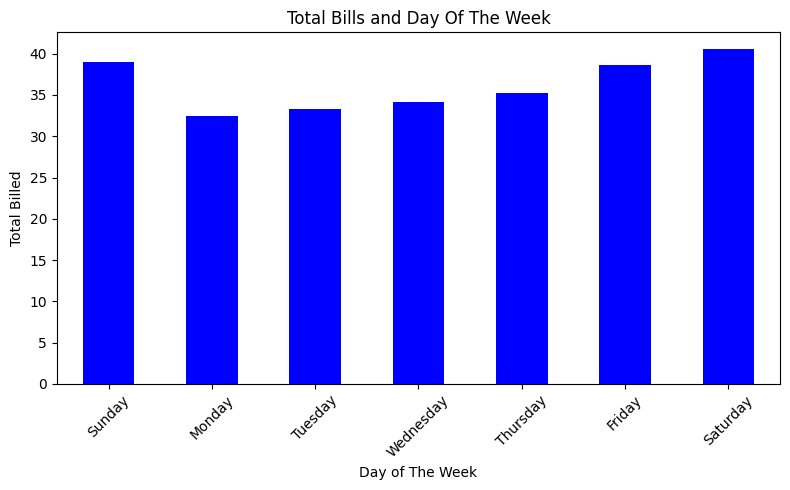

In [8]:
average_bill_per_day = average_bill_per_day.sort_index()

plt.figure(figsize=(8,5))
average_bill_per_day.plot(kind='bar', color='blue')
plt.title('Total Bills and Day Of The Week')
plt.xlabel('Day of The Week')
plt.ylabel('Total Billed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()